# Venue Analysis
Analysing how the total scores and the wickets fallen changes with different venues. General consensus is that wickets in India, Australia usually produce high scoring games. 
Factors affecting the venues:
	- Soil Nature
	- Weather Conditions
	- Dimensions of the ground

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('../Data/selected_data/processed_data_NRR.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215252 entries, 0 to 215251
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   batter               215252 non-null  object 
 1   bowler               215252 non-null  object 
 2   non_striker          215252 non-null  object 
 3   runs_by_bat          215252 non-null  int64  
 4   extra_runs           215252 non-null  int64  
 5   total_runs_delivery  215252 non-null  int64  
 6   current_team_total   215252 non-null  int64  
 7   runs_remain          215252 non-null  float64
 8   batter_runs          215252 non-null  int64  
 9   balls_faced          215252 non-null  int64  
 10  wickets_fallen       215252 non-null  int64  
 11  extra_type           215252 non-null  object 
 12  delivery             215252 non-null  float64
 13  over                 215252 non-null  int64  
 14  wicket_type          215252 non-null  object 
 15  player_out       

In [173]:
data.sort_values(by='venue')['venue'].unique()

array(['AMI Stadium', 'Adelaide Oval', 'Arnos Vale Ground, Kingstown',
       'Arun Jaitley Stadium', 'Arun Jaitley Stadium, Delhi',
       'Barabati Stadium', 'Barabati Stadium, Cuttack',
       'Barsapara Cricket Stadium', 'Barsapara Cricket Stadium, Guwahati',
       'Bay Oval', 'Bay Oval, Mount Maunganui',
       'Beausejour Stadium, Gros Islet', 'Bellerive Oval',
       'Bellerive Oval, Hobart',
       'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium',
       'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow',
       'Boland Park', 'Brabourne Stadium', 'Bready',
       'Bready Cricket Club, Magheramason',
       'Bready Cricket Club, Magheramason, Bready',
       'Brian Lara Stadium, Tarouba, Trinidad',
       'Brisbane Cricket Ground, Woolloongabba',
       'Brisbane Cricket Ground, Woolloongabba, Brisbane', 'Buffalo Park',
       'Carrara Oval', 'Castle Avenue, Dublin',
       'Central Broward Regional Park Stadium Turf Ground',
       'Central 

In [174]:
stadium_mapping = {
    'AMI Stadium': ('AMI Stadium', 'New Zealand'),
    'Adelaide Oval': ('Adelaide Oval', 'Australia'),
    'Arnos Vale Ground, Kingstown': ('Arnos Vale Ground', 'St Vincent and the Grenadines'),
    'Arun Jaitley Stadium': ('Arun Jaitley Stadium', 'India'),
    'Arun Jaitley Stadium, Delhi': ('Arun Jaitley Stadium', 'India'),
    'Barabati Stadium': ('Barabati Stadium', 'India'),
    'Barabati Stadium, Cuttack': ('Barabati Stadium', 'India'),
    'Barsapara Cricket Stadium': ('Barsapara Cricket Stadium', 'India'),
    'Barsapara Cricket Stadium, Guwahati': ('Barsapara Cricket Stadium', 'India'),
    'Bay Oval': ('Bay Oval', 'New Zealand'),
    'Bay Oval, Mount Maunganui': ('Bay Oval', 'New Zealand'),
    'Beausejour Stadium, Gros Islet': ('Daren Sammy National Cricket Stadium', 'St Lucia'),
    'Bellerive Oval': ('Bellerive Oval', 'Australia'),
    'Bellerive Oval, Hobart': ('Bellerive Oval', 'Australia'),
    'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium': ('Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium', 'India'),
    'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow': ('Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium', 'India'),
    'Boland Park': ('Boland Park', 'South Africa'),
    'Brabourne Stadium': ('Brabourne Stadium', 'India'),
    'Bready': ('Bready Cricket Club', 'Ireland'),
    'Bready Cricket Club, Magheramason': ('Bready Cricket Club', 'Ireland'),
    'Bready Cricket Club, Magheramason, Bready': ('Bready Cricket Club', 'Ireland'),
    'Brian Lara Stadium, Tarouba, Trinidad': ('Brian Lara Stadium', 'Trinidad and Tobago'),
    'Brisbane Cricket Ground, Woolloongabba': ('Brisbane Cricket Ground', 'Australia'),
    'Brisbane Cricket Ground, Woolloongabba, Brisbane': ('Brisbane Cricket Ground', 'Australia'),
    'Buffalo Park': ('Buffalo Park', 'South Africa'),
    'Carrara Oval': ('Carrara Oval', 'Australia'),
    'Castle Avenue, Dublin': ('Castle Avenue', 'Ireland'),
    'Central Broward Regional Park Stadium Turf Ground': ('Central Broward Regional Park Stadium', 'USA'),
    'Central Broward Regional Park Stadium Turf Ground, Lauderhill': ('Central Broward Regional Park Stadium', 'USA'),
    'Civil Service Cricket Club, Stormont': ('Civil Service Cricket Club', 'Northern Ireland'),
    'Civil Service Cricket Club, Stormont, Belfast': ('Civil Service Cricket Club', 'Northern Ireland'),
    'Coolidge Cricket Ground, Antigua': ('Coolidge Cricket Ground', 'Antigua and Barbuda'),
    'County Ground': ('County Ground', 'England'),
    'County Ground, Bristol': ('County Ground', 'England'),
    'Daren Sammy National Cricket Stadium, Gros Islet, St Lucia': ('Daren Sammy National Cricket Stadium', 'St Lucia'),
    'Darren Sammy National Cricket Stadium, St Lucia': ('Daren Sammy National Cricket Stadium', 'St Lucia'),
    'De Beers Diamond Oval': ('De Beers Diamond Oval', 'South Africa'),
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': ('Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', 'India'),
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam': ('Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', 'India'),
    'Dubai International Cricket Stadium': ('Dubai International Cricket Stadium', 'UAE'),
    'Eden Gardens': ('Eden Gardens', 'India'),
    'Eden Gardens, Kolkata': ('Eden Gardens', 'India'),
    'Eden Park': ('Eden Park', 'New Zealand'),
    'Eden Park, Auckland': ('Eden Park', 'New Zealand'),
    'Edgbaston': ('Edgbaston', 'England'),
    'Edgbaston, Birmingham': ('Edgbaston', 'England'),
    'Feroz Shah Kotla': ('Arun Jaitley Stadium', 'India'),
    'Gaddafi Stadium': ('Gaddafi Stadium', 'Pakistan'),
    'Gaddafi Stadium, Lahore': ('Gaddafi Stadium', 'Pakistan'),
    'Greater Noida Sports Complex Ground': ('Greater Noida Sports Complex Ground', 'India'),
    'Green Park': ('Green Park', 'India'),
    'Greenfield International Stadium': ('Greenfield International Stadium', 'India'),
    'Greenfield International Stadium, Thiruvananthapuram': ('Greenfield International Stadium', 'India'),
    'Gymkhana Club Ground': ('Gymkhana Club Ground', 'India'),
    'Hagley Oval': ('Hagley Oval', 'New Zealand'),
    'Hagley Oval, Christchurch': ('Hagley Oval', 'New Zealand'),
    'Harare Sports Club': ('Harare Sports Club', 'Zimbabwe'),
    'Headingley, Leeds': ('Headingley', 'England'),
    'Himachal Pradesh Cricket Association Stadium': ('Himachal Pradesh Cricket Association Stadium', 'India'),
    'Himachal Pradesh Cricket Association Stadium, Dharamsala': ('Himachal Pradesh Cricket Association Stadium', 'India'),
    'Holkar Cricket Stadium': ('Holkar Cricket Stadium', 'India'),
    'Holkar Cricket Stadium, Indore': ('Holkar Cricket Stadium', 'India'),
    'JSCA International Stadium Complex': ('JSCA International Stadium Complex', 'India'),
    'JSCA International Stadium Complex, Ranchi': ('JSCA International Stadium Complex', 'India'),
    'Jade Stadium': ('Jade Stadium', 'New Zealand'),
    'John Davies Oval, Queenstown': ('John Davies Oval', 'New Zealand'),
    'Kennington Oval': ('The Oval', 'England'),
    'Kensington Oval, Bridgetown': ('Kensington Oval', 'Barbados'),
    'Kensington Oval, Bridgetown, Barbados': ('Kensington Oval', 'Barbados'),
    'Kingsmead': ('Kingsmead', 'South Africa'),
    'Kingsmead, Durban': ('Kingsmead', 'South Africa'),
    "Lord's": ("Lord's", 'England'),
    'M Chinnaswamy Stadium': ('M. Chinnaswamy Stadium', 'India'),
    'M Chinnaswamy Stadium, Bengaluru': ('M. Chinnaswamy Stadium', 'India'),
    'M.Chinnaswamy Stadium': ('M. Chinnaswamy Stadium', 'India'),
    'MA Chidambaram Stadium, Chepauk': ('MA Chidambaram Stadium', 'India'),
    'Maharashtra Cricket Association Stadium': ('Maharashtra Cricket Association Stadium', 'India'),
    'Maharashtra Cricket Association Stadium, Pune': ('Maharashtra Cricket Association Stadium', 'India'),
    'Mahinda Rajapaksa International Cricket Stadium, Sooriyawewa': ('Mahinda Rajapaksa International Cricket Stadium', 'Sri Lanka'),
    'Malahide, Dublin': ('Malahide Cricket Club Ground', 'Ireland'),
    'Mangaung Oval': ('Mangaung Oval', 'South Africa'),
    'Manuka Oval': ('Manuka Oval', 'Australia'),
    'Manuka Oval, Canberra': ('Manuka Oval', 'Australia'),
    'Maple Leaf North-West Ground': ('Maple Leaf Cricket Club', 'Canada'),
    'McLean Park': ('McLean Park', 'New Zealand'),
    'McLean Park, Napier': ('McLean Park', 'New Zealand'),
    'Melbourne Cricket Ground': ('Melbourne Cricket Ground', 'Australia'),
    'Moses Mabhida Stadium': ('Moses Mabhida Stadium', 'South Africa'),
    'Narendra Modi Stadium': ('Narendra Modi Stadium', 'India'),
    'Narendra Modi Stadium, Ahmedabad': ('Narendra Modi Stadium', 'India'),
    'National Cricket Stadium, Grenada': ('National Cricket Stadium', 'Grenada'),
    "National Cricket Stadium, St George's, Grenada": ('National Cricket Stadium', 'Grenada'),
    'National Stadium': ('National Stadium', 'Pakistan'),
    'National Stadium, Karachi': ('National Stadium', 'Pakistan'),
    'New Wanderers Stadium': ('New Wanderers Stadium', 'South Africa'),
    'Newlands': ('Newlands Cricket Ground', 'South Africa'),
    'OUTsurance Oval': ('Mangaung Oval', 'South Africa'),
    'Old Trafford': ('Old Trafford', 'England'),
    'Old Trafford, Manchester': ('Old Trafford', 'England'),
    'Pallekele International Cricket Stadium': ('Pallekele International Cricket Stadium', 'Sri Lanka'),
    'Perth Stadium': ('Perth Stadium', 'Australia'),
    'Providence Stadium': ('Providence Stadium', 'Guyana'),
    'Providence Stadium, Guyana': ('Providence Stadium', 'Guyana'),
    'Punjab Cricket Association IS Bindra Stadium, Mohali': ('Punjab Cricket Association IS Bindra Stadium', 'India'),
    'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh': ('Punjab Cricket Association IS Bindra Stadium', 'India'),
    'Punjab Cricket Association Stadium, Mohali': ('Punjab Cricket Association IS Bindra Stadium', 'India'),
    "Queen's Park Oval, Port of Spain": ("Queen's Park Oval", 'Trinidad and Tobago'),
    'Queens Sports Club': ('Queens Sports Club', 'Zimbabwe'),
    'R Premadasa Stadium': ('R. Premadasa Stadium', 'Sri Lanka'),
    'R Premadasa Stadium, Colombo': ('R. Premadasa Stadium', 'Sri Lanka'),
    'R.Premadasa Stadium, Khettarama': ('R. Premadasa Stadium', 'Sri Lanka'),
    'Rajiv Gandhi International Cricket Stadium': ('Rajiv Gandhi International Cricket Stadium', 'India'),
    'Rajiv Gandhi International Cricket Stadium, Dehradun': ('Rajiv Gandhi International Cricket Stadium', 'India'),
    'Rajiv Gandhi International Stadium, Uppal': ('Rajiv Gandhi International Cricket Stadium', 'India'),
    'Rajiv Gandhi International Stadium, Uppal, Hyderabad': ('Rajiv Gandhi International Cricket Stadium', 'India'),
    'Rangiri Dambulla International Stadium': ('Rangiri Dambulla International Stadium', 'Sri Lanka'),
    'Rawalpindi Cricket Stadium': ('Rawalpindi Cricket Stadium', 'Pakistan'),
    'Riverside Ground': ('Riverside Ground', 'England'),
    'Riverside Ground, Chester-le-Street': ('Riverside Ground', 'England'),
    'Sabina Park, Kingston': ('Sabina Park', 'Jamaica'),
    'Sabina Park, Kingston, Jamaica': ('Sabina Park', 'Jamaica'),
    'Sardar Patel Stadium, Motera': ('Narendra Modi Stadium', 'India'),
    'Saurashtra Cricket Association Stadium': ('Saurashtra Cricket Association Stadium', 'India'),
    'Saurashtra Cricket Association Stadium, Rajkot': ('Saurashtra Cricket Association Stadium', 'India'),
    'Sawai Mansingh Stadium, Jaipur': ('Sawai Mansingh Stadium', 'India'),
    'Saxton Oval': ('Saxton Oval', 'New Zealand'),
    'Seddon Park': ('Seddon Park', 'New Zealand'),
    'Seddon Park, Hamilton': ('Seddon Park', 'New Zealand'),
    'Senwes Park': ('Senwes Park', 'South Africa'),
    'Shaheed Veer Narayan Singh International Stadium, Raipur': ('Shaheed Veer Narayan Singh International Stadium', 'India'),
    'Sharjah Cricket Stadium': ('Sharjah Cricket Stadium', 'UAE'),
    'Sheikh Abu Naser Stadium': ('Sheikh Abu Naser Stadium', 'Bangladesh'),
    'Sheikh Zayed Stadium': ('Sheikh Zayed Stadium', 'UAE'),
    'Shere Bangla National Stadium': ('Shere Bangla National Stadium', 'Bangladesh'),
    'Shere Bangla National Stadium, Mirpur': ('Shere Bangla National Stadium', 'Bangladesh'),
    'Simonds Stadium, South Geelong': ('GMHBA Stadium', 'Australia'),
    'Sir Vivian Richards Stadium, North Sound': ('Sir Vivian Richards Stadium', 'Antigua and Barbuda'),
    'Sky Stadium': ('Sky Stadium', 'New Zealand'),
    'Sky Stadium, Wellington': ('Sky Stadium', 'New Zealand'),
    'Sophia Gardens': ('Sophia Gardens', 'Wales'),
    'Sophia Gardens, Cardiff': ('Sophia Gardens', 'Wales'),
    "St George's Park": ("St George's Park", 'South Africa'),
    "St George's Park, Gqeberha": ("St George's Park", 'South Africa'),
    'Stadium Australia': ('Stadium Australia', 'Australia'),
    'Subrata Roy Sahara Stadium': ('Maharashtra Cricket Association Stadium', 'India'),
    'SuperSport Park': ('SuperSport Park', 'South Africa'),
    'SuperSport Park, Centurion': ('SuperSport Park', 'South Africa'),
    'Sydney Cricket Ground': ('Sydney Cricket Ground', 'Australia'),
    'Sylhet International Cricket Stadium': ('Sylhet International Cricket Stadium', 'Bangladesh'),
    'Sylhet Stadium': ('Sylhet International Cricket Stadium', 'Bangladesh'),
    'The Rose Bowl': ('The Rose Bowl', 'England'),
    'The Rose Bowl, Southampton': ('The Rose Bowl', 'England'),
    'The Village, Malahide': ('Malahide Cricket Club Ground', 'Ireland'),
    'The Village, Malahide, Dublin': ('Malahide Cricket Club Ground', 'Ireland'),
    'The Wanderers Stadium': ('New Wanderers Stadium', 'South Africa'),
    'The Wanderers Stadium, Johannesburg': ('New Wanderers Stadium', 'South Africa'),
    'Trent Bridge': ('Trent Bridge', 'England'),
    'Trent Bridge, Nottingham': ('Trent Bridge', 'England'),
    'University Oval': ('University Oval', 'New Zealand'),
    'University Oval, Dunedin': ('University Oval', 'New Zealand'),
    'Vidarbha Cricket Association Stadium, Jamtha': ('Vidarbha Cricket Association Stadium', 'India'),
    'Vidarbha Cricket Association Stadium, Jamtha, Nagpur': ('Vidarbha Cricket Association Stadium', 'India'),
    'Wankhede Stadium': ('Wankhede Stadium', 'India'),
    'Wankhede Stadium, Mumbai': ('Wankhede Stadium', 'India'),
    'Warner Park, Basseterre': ('Warner Park Sporting Complex', 'St Kitts and Nevis'),
    'Warner Park, Basseterre, St Kitts': ('Warner Park Sporting Complex', 'St Kitts and Nevis'),
    'Warner Park, St Kitts': ('Warner Park Sporting Complex', 'St Kitts and Nevis'),
    'Western Australia Cricket Association Ground': ('WACA Ground', 'Australia'),
    'Westpac Stadium': ('Sky Stadium', 'New Zealand'),
    'Windsor Park, Roseau': ('Windsor Park', 'Dominica'),
    'Windsor Park, Roseau, Dominica': ('Windsor Park', 'Dominica'),
    'Zahur Ahmed Chowdhury Stadium': ('Zahur Ahmed Chowdhury Stadium', 'Bangladesh'),
    'Zahur Ahmed Chowdhury Stadium, Chattogram': ('Zahur Ahmed Chowdhury Stadium', 'Bangladesh'),
    'Zayed Cricket Stadium, Abu Dhabi': ('Zayed Cricket Stadium', 'UAE'),
    'Zhejiang University of Technology Cricket Field': ('Zhejiang University of Technology Cricket Field', 'China')
}



In [175]:
# Create new 'host' column
data['host'] = data['venue'].map(lambda x: stadium_mapping.get(x, (x, ''))[1])

# Update venue names
data['venue'] = data['venue'].map(lambda x: stadium_mapping.get(x, (x, ''))[0])


data['host'].unique()

array(['Australia', 'Zimbabwe', 'New Zealand', 'England', 'Wales',
       'India', 'USA', 'UAE', 'South Africa', 'Barbados',
       'Trinidad and Tobago', 'Sri Lanka', 'Jamaica', 'Pakistan',
       'Bangladesh', 'Ireland', 'St Kitts and Nevis', 'St Lucia',
       'Guyana', 'Grenada', 'Northern Ireland', 'Antigua and Barbuda',
       'Dominica', 'China', 'Canada', 'St Vincent and the Grenadines'],
      dtype=object)

In [176]:
gp = data[data['innings'] == 2].groupby('match_id')
gp = gp.last().reset_index();


gp['first_innings_total'] = gp['final_team_total'] + gp['runs_remain'];
gp['second_innings_total'] = gp['final_team_total'];
gp.drop('final_team_total', inplace=True, axis=1);

venues_df = gp[['match_id', 'first_innings_total', 'second_innings_total', 'venue', 'won', 'host']]
venues_df.head()


,match_id,first_innings_total,second_innings_total,venue,won,host
0,Afghanistan_Bangladesh_2018-06-03,167.0,122,Rajiv Gandhi International Cricket Stadium,0.0,India
1,Afghanistan_Bangladesh_2018-06-07,145.0,144,Rajiv Gandhi International Cricket Stadium,0.0,India
2,Afghanistan_Bangladesh_2023-07-14,154.0,157,Sylhet International Cricket Stadium,1.0,Bangladesh
3,Afghanistan_Bangladesh_2023-07-16,116.0,119,Sylhet International Cricket Stadium,1.0,Bangladesh
4,Afghanistan_England_2022-10-22,112.0,113,Perth Stadium,1.0,Australia


In [177]:
# Tied Matches
venues_df[venues_df['won'] == -1]

,match_id,first_innings_total,second_innings_total,venue,won,host
14,Afghanistan_Ireland_2020-03-10,142.0,142,Greater Noida Sports Complex Ground,-1.0,India
91,Australia_Pakistan_2012-09-07,151.0,151,Dubai International Cricket Stadium,-1.0,UAE
121,Australia_Sri Lanka_2022-02-13,164.0,164,Sydney Cricket Ground,-1.0,Australia
261,England_Pakistan_2015-11-30,154.0,154,Sharjah Cricket Stadium,-1.0,UAE
306,India_Afghanistan_2024-01-17,212.0,212,M. Chinnaswamy Stadium,-1.0,India
354,India_Pakistan_2007-09-14,141.0,141,Kingsmead,-1.0,South Africa
442,New Zealand_Australia_2010-02-28,214.0,214,AMI Stadium,-1.0,New Zealand
474,New Zealand_England_2019-11-10,146.0,146,Eden Park,-1.0,New Zealand
485,New Zealand_India_2020-01-29,179.0,179,Seddon Park,-1.0,New Zealand
486,New Zealand_India_2020-01-31,165.0,165,Sky Stadium,-1.0,New Zealand


In [178]:
#Change "won" value mapping, bat first won = True
won_mapping = {-1: None, 0: True, 1: False}
venues_df['won'] = venues_df['won'].map(won_mapping)

# venues_df['first_bat_won'] = venues_df['won'].map({-1: False, 0: None, 1:True})
venues_df.head()

C:\Users\kaush\AppData\Local\Temp\ipykernel_25260\3758617340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  venues_df['won'] = venues_df['won'].map(won_mapping)


,match_id,first_innings_total,second_innings_total,venue,won,host
0,Afghanistan_Bangladesh_2018-06-03,167.0,122,Rajiv Gandhi International Cricket Stadium,True,India
1,Afghanistan_Bangladesh_2018-06-07,145.0,144,Rajiv Gandhi International Cricket Stadium,True,India
2,Afghanistan_Bangladesh_2023-07-14,154.0,157,Sylhet International Cricket Stadium,False,Bangladesh
3,Afghanistan_Bangladesh_2023-07-16,116.0,119,Sylhet International Cricket Stadium,False,Bangladesh
4,Afghanistan_England_2022-10-22,112.0,113,Perth Stadium,False,Australia


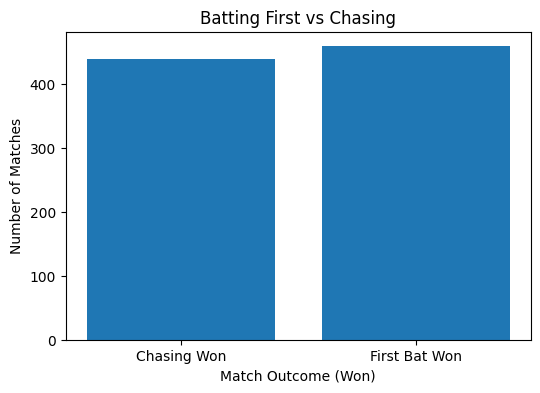

In [179]:
# Count occurrences of True and False
value_counts = venues_df['won'].value_counts()

# Create a count plot
plt.figure(figsize=(6, 4))  # Adjust figure size as desired
plt.bar(value_counts.index, value_counts.values)
plt.xlabel("Match Outcome (Won)")
plt.xticks([-0, 1], ['Chasing Won', 'First Bat Won'])
plt.ylabel("Number of Matches")
plt.title("Batting First vs Chasing")
plt.show()

In [180]:
venues_df[venues_df['venue'] == 'Edgbaston']

,match_id,first_innings_total,second_innings_total,venue,won,host
88,Australia_Pakistan_2010-07-05,167.0,144,Edgbaston,True,England
89,Australia_Pakistan_2010-07-06,162.0,151,Edgbaston,True,England
220,England_Australia_2018-06-27,221.0,193,Edgbaston,True,England
231,England_India_2014-09-07,180.0,177,Edgbaston,True,England
271,England_South Africa_2012-09-12,118.0,90,Edgbaston,True,England
338,India_England_2022-07-09,170.0,121,Edgbaston,True,England
476,New Zealand_England_2023-09-03,202.0,128,Edgbaston,True,England


In [184]:
gp = venues_df.groupby('venue')
total_mean = gp['first_innings_total'].mean()
total_std = gp['first_innings_total'].std()

first_bat_won_ratio = gp['won'].mean()
number_of_matches = gp.size()
host = gp.last()['host']

df = pd.DataFrame()
df['total_mean'] = total_mean
df['total_std'] = total_std
df['first_bat_won_ratio'] = first_bat_won_ratio
df['number_of_matches'] = number_of_matches
df['host'] = host

df.reset_index(inplace=True)
df.head(20)

,venue,total_mean,total_std,first_bat_won_ratio,number_of_matches,host
0,AMI Stadium,186.333333,26.159766,0.5,3,New Zealand
1,Adelaide Oval,180.181818,34.067046,0.636364,11,Australia
2,Arnos Vale Ground,143.500000,12.020815,0.5,2,St Vincent and the Grenadines
3,Arun Jaitley Stadium,167.500000,34.471728,0.333333,6,India
4,Barabati Stadium,140.000000,44.542115,0.333333,3,India
5,Barsapara Cricket Stadium,192.333333,64.809979,0.333333,3,India
6,Bay Oval,188.555556,39.386264,0.888889,9,New Zealand
7,Bellerive Oval,170.125000,30.819463,0.625,8,Australia
8,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,160.000000,36.518488,0.833333,6,India
9,Boland Park,146.000000,NaN,0.0,1,South Africa


In [185]:
df.sort_values(by='first_bat_won_ratio', ascending=False)

,venue,total_mean,total_std,first_bat_won_ratio,number_of_matches,host
27,Edgbaston,174.285714,32.591994,1.0,7,England
79,Shaheed Veer Narayan Singh International Stadium,174.000000,NaN,1.0,1,India
70,Rangiri Dambulla International Stadium,185.333333,24.542480,1.0,3,Sri Lanka
33,Gymkhana Club Ground,191.000000,NaN,1.0,1,India
40,Jade Stadium,193.000000,NaN,1.0,1,New Zealand
...,...,...,...,...,...,...
31,Green Park,147.000000,NaN,0.0,1,India
28,GMHBA Stadium,173.000000,NaN,0.0,1,Australia
10,Brabourne Stadium,166.000000,NaN,0.0,1,India
9,Boland Park,146.000000,NaN,0.0,1,South Africa


In [187]:
df[df['number_of_matches'] > 3].sort_values(by='total_mean', ascending=False)

,venue,total_mean,total_std,first_bat_won_ratio,number_of_matches,host
38,Holkar Cricket Stadium,200.250000,53.156216,0.5,4,India
58,National Stadium,189.727273,22.991698,0.636364,11,Pakistan
74,Saurashtra Cricket Association Stadium,189.400000,29.194178,0.6,5,India
6,Bay Oval,188.555556,39.386264,0.888889,9,New Zealand
98,Wankhede Stadium,188.142857,36.612514,0.285714,7,India
...,...,...,...,...,...,...
99,Warner Park Sporting Complex,136.285714,35.368132,0.142857,7,St Kitts and Nevis
84,Sir Vivian Richards Stadium,136.000000,16.083117,0.75,4,Antigua and Barbuda
48,Mahinda Rajapaksa International Cricket Stadium,130.714286,36.867846,0.714286,7,Sri Lanka
66,Queen's Park Oval,129.666667,18.084985,0.5,6,Trinidad and Tobago


In [189]:
df.to_csv("../Data/selected_data/venues.csv")

<Axes: ylabel='Frequency'>

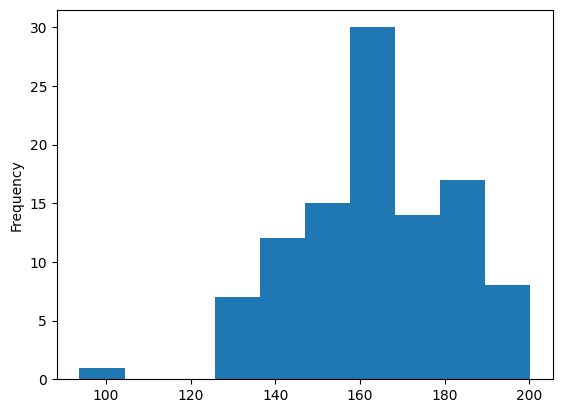

In [190]:
df['total_mean'].plot.hist()

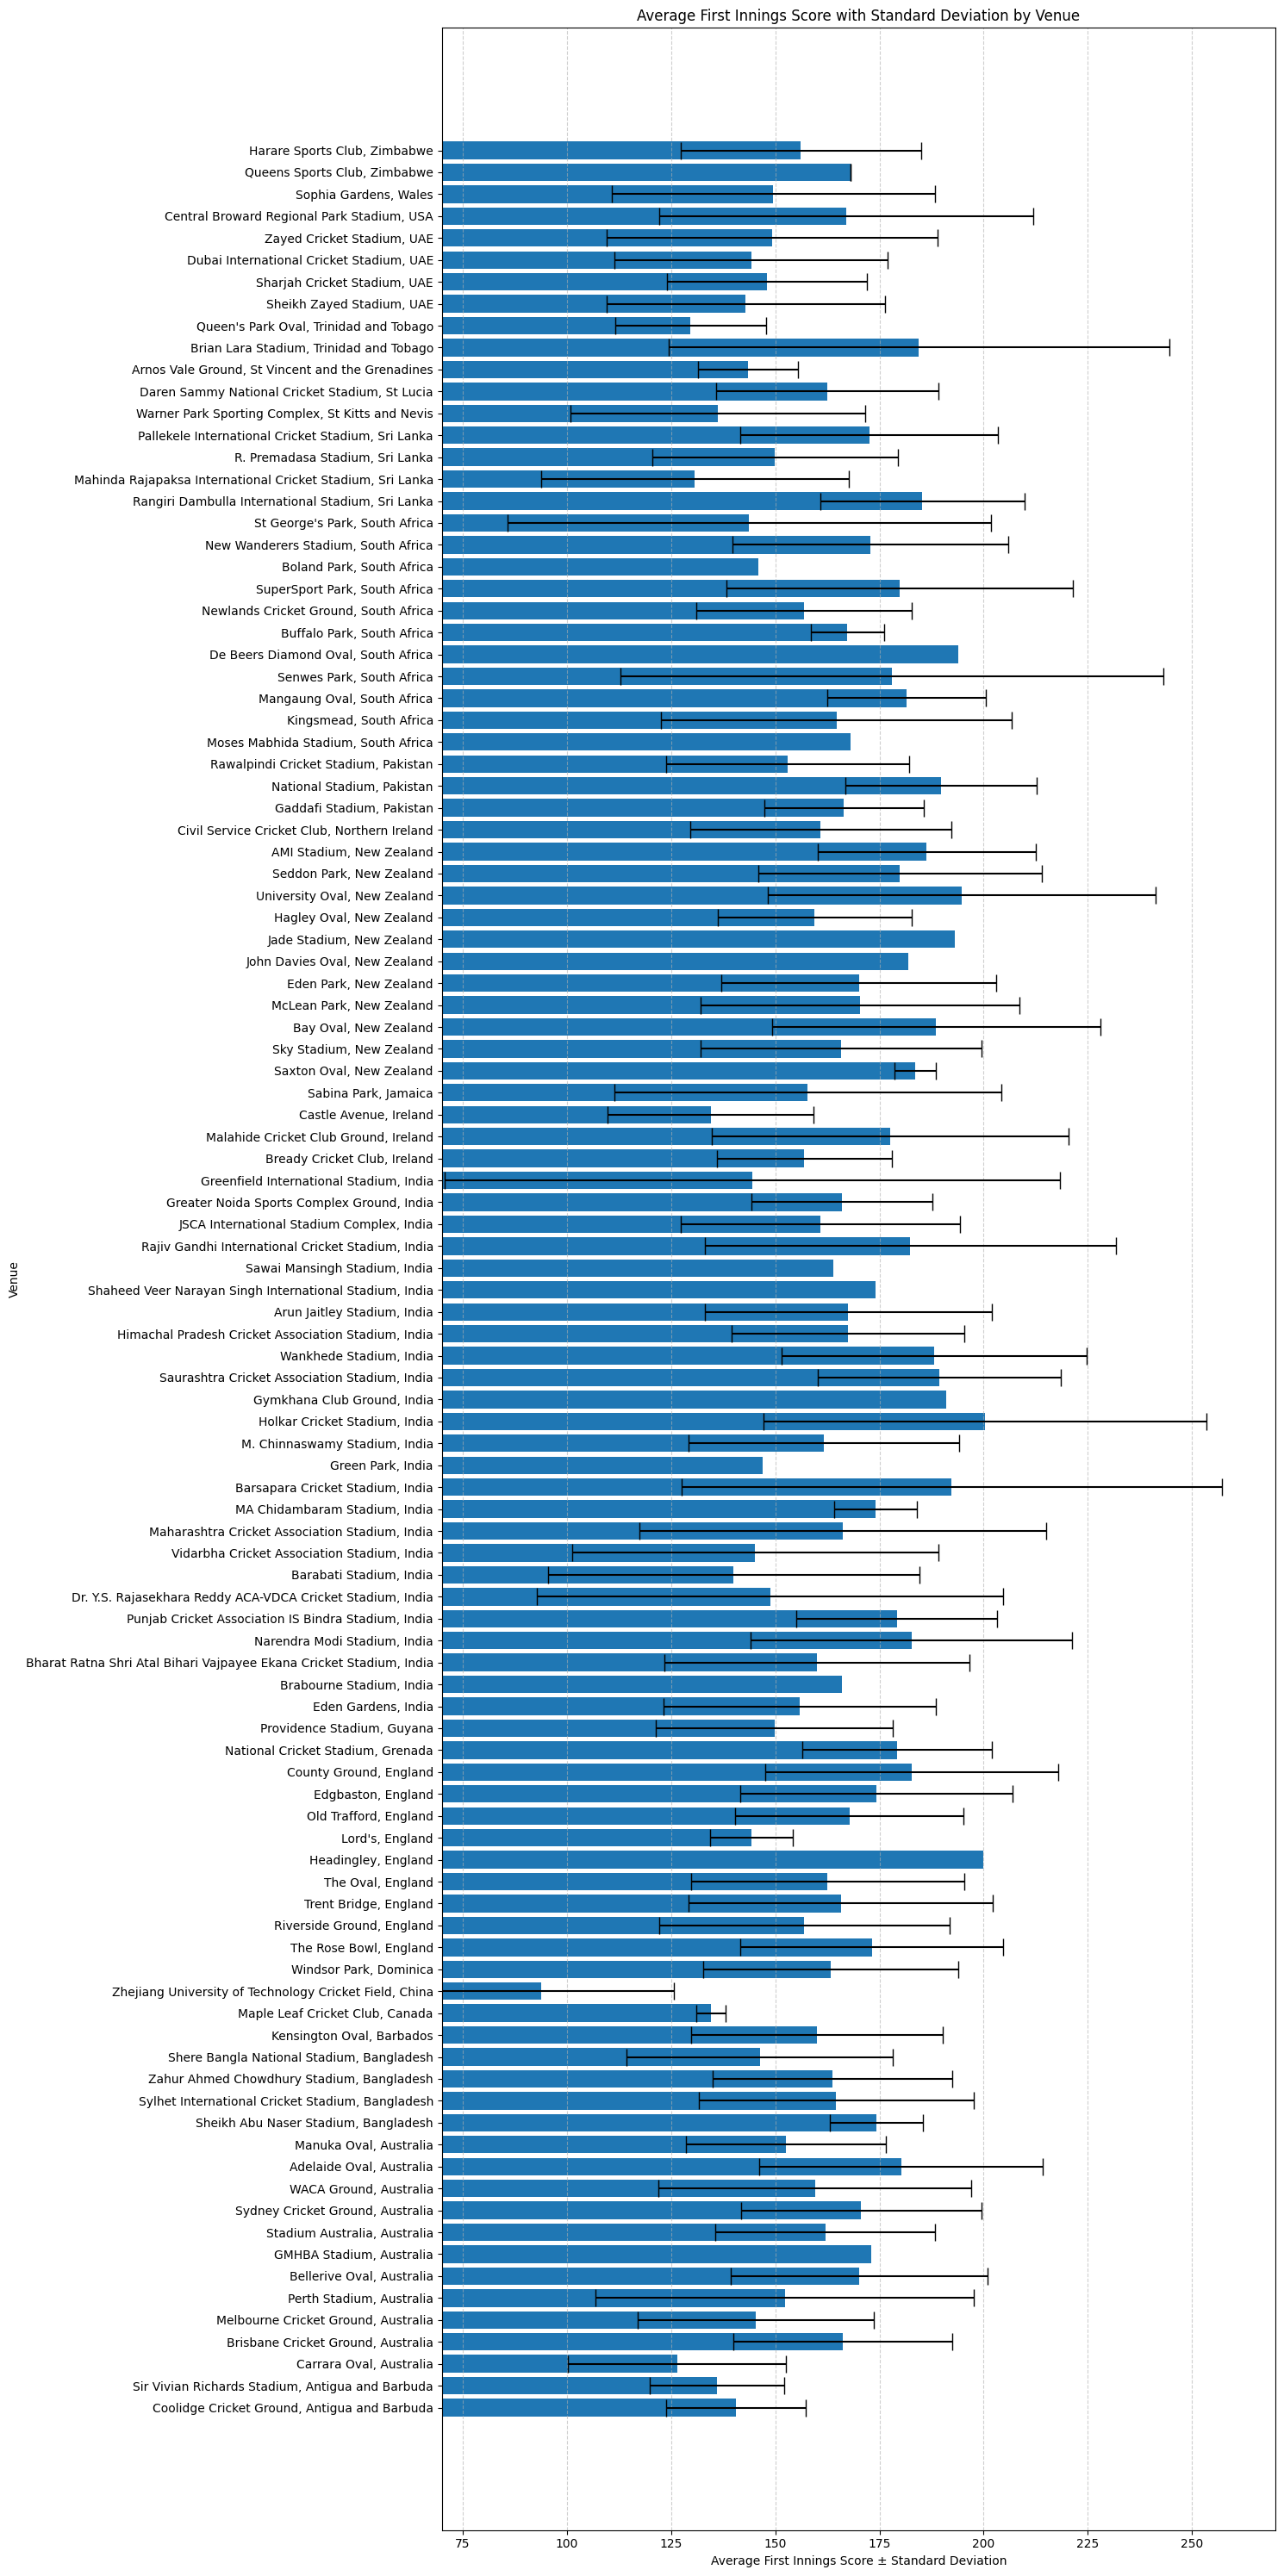

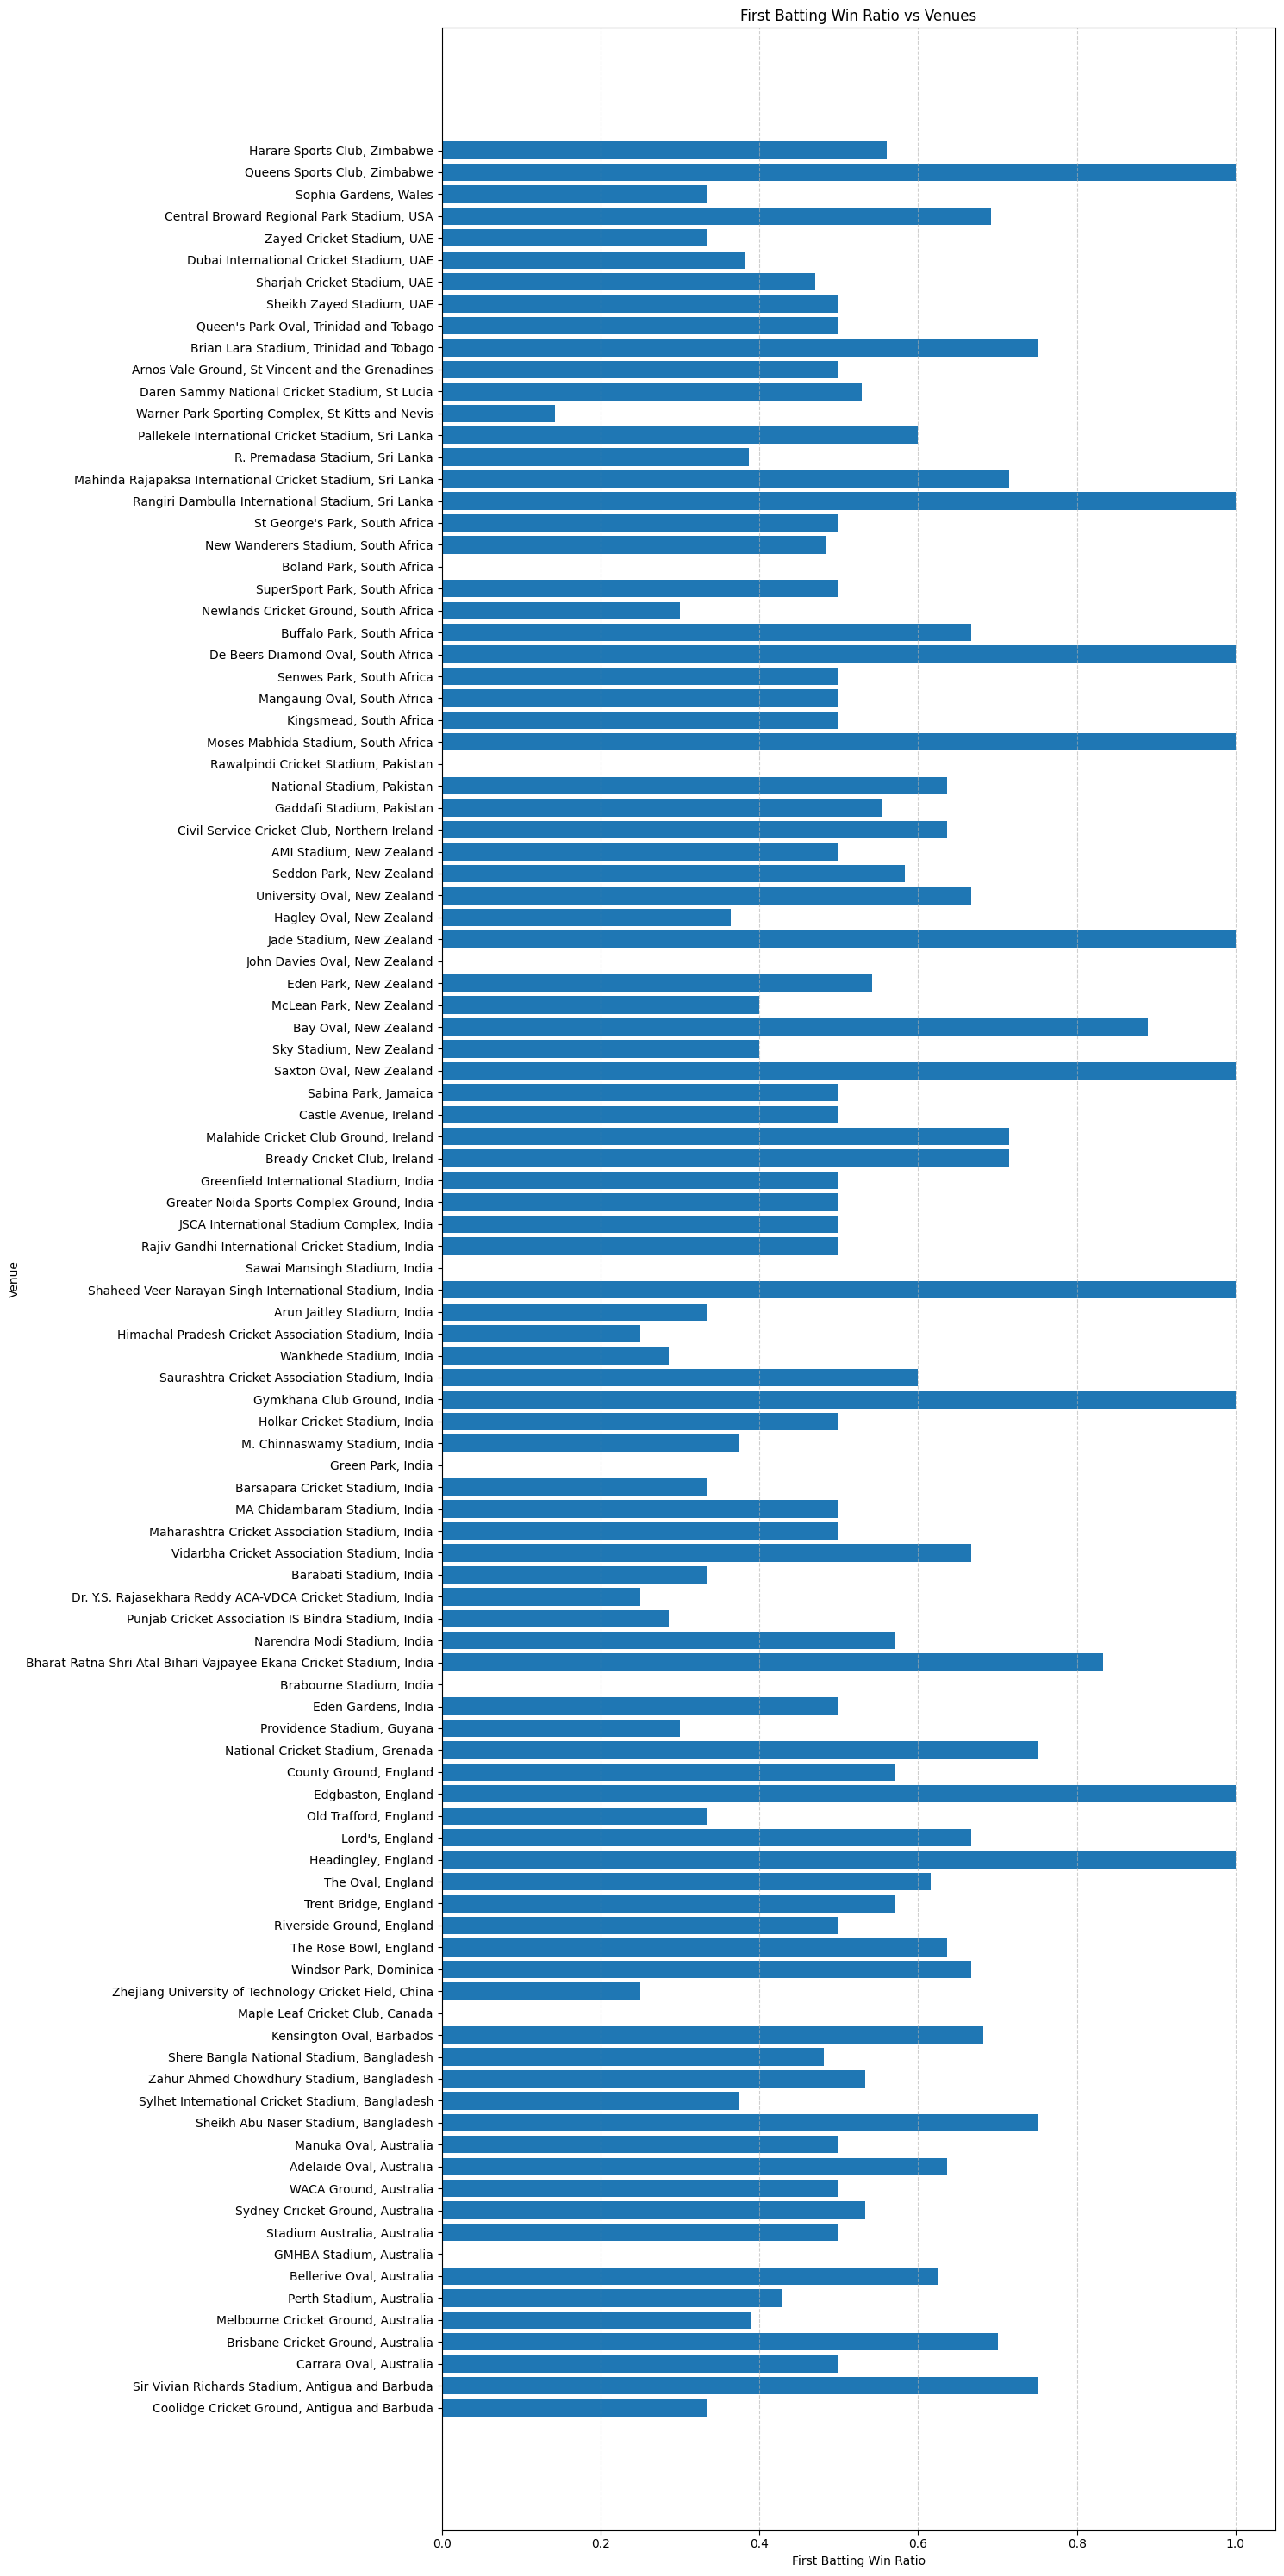

In [212]:
import pandas as pd
import matplotlib.pyplot as plt

# sorting by host
df.sort_values(by='host', inplace=True)

# Create the bar chart with error bars
plt.figure(figsize=(15, 30))  # Adjust figure size as desired
plt.barh(df['venue'] + ", " + df['host'], df['total_mean'], xerr=df['total_std'], capsize=7)  # Adjust error bar cap size

plt.xlabel('Average First Innings Score ± Standard Deviation')
plt.ylabel('Venue')
plt.title('Average First Innings Score with Standard Deviation by Venue')
plt.xlim(70, None)
# Add grid lines
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Add horizontal grid lines

# Display the chart
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

plt.figure(figsize=(15, 30))  # Adjust figure size as desired
plt.barh(df['venue'] + ", " + df['host'], df['first_bat_won_ratio'])  # Adjust error bar cap size

plt.xlabel('First Batting Win Ratio')
plt.ylabel('Venue')
plt.title('First Batting Win Ratio vs Venues')

# Add grid lines
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Add horizontal grid lines

# Display the chart
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()



# Analysis By Host Nation

In [209]:
gp = venues_df.groupby('host')
total_mean = gp['first_innings_total'].mean()
total_std = gp['first_innings_total'].std()

first_bat_won_ratio = gp['won'].mean()
number_of_matches = gp.size()

host_df = pd.DataFrame()
host_df['total_mean'] = total_mean
host_df['total_std'] = total_std
host_df['first_bat_won_ratio'] = first_bat_won_ratio
host_df['number_of_matches'] = number_of_matches

host_df.reset_index(inplace=True)
host_df.head(20)

,host,total_mean,total_std,first_bat_won_ratio,number_of_matches
0,Antigua and Barbuda,138.000000,15.132746,0.571429,7
1,Australia,161.686747,31.821502,0.52439,83
2,Bangladesh,152.740741,31.761525,0.493827,81
3,Barbados,159.909091,30.185000,0.681818,22
4,Canada,134.500000,3.535534,0.0,2
5,China,93.750000,31.857757,0.25,4
6,Dominica,163.333333,30.534134,0.666667,3
7,England,167.236111,31.728822,0.611111,72
8,Grenada,179.250000,22.795676,0.75,8
9,Guyana,149.800000,28.389356,0.3,10
